In [1]:
from matplotlib import pyplot as plt
import seaborn as sns 
import pandas as pd
import numpy as np 
import pathlib 
plt.rcParams["font.family"] = "Nimbus Roman"


In [2]:
with open("calibration_results/metrics.csv") as f:
    metric_df = pd.read_csv(f)
metric_df['Calibration Error'] *= 100

'NimbusRoman-Regular.otf' can not be subsetted into a Type 3 font. The entire font will be embedded in the output.


       Model    Dataset     Split     EM  Calibration Error  \
0       MISO  CalflowV2  test_all  78.85               3.69   
1   T5-small  CalflowV2  test_all  58.77               4.27   
2    T5-base  CalflowV2  test_all  76.96               4.33   
3   T5-large  CalflowV2  test_all  81.72               3.95   
4  BART-base  CalflowV2  test_all  81.51               4.34   

   Calibration Error (above)  Calibration Error (below) Params  \
0                     0.0035                     0.0334   127M   
1                     0.0000                     0.0426    60M   
2                     0.0004                     0.0428   220M   
3                     0.0005                     0.0390   770M   
4                     0.0008                     0.0425   139M   

                                          Model Path  \
0  /brtx/604-nvme1/estengel/calflow_calibration/m...   
1  /brtx/603-nvme1/estengel/calflow_calibration/b...   
2  /brtx/603-nvme1/estengel/calflow_calibration/b...   


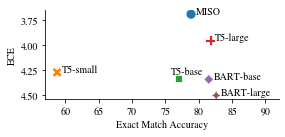

In [6]:
cf_metric_df = metric_df[metric_df['Dataset'] == "CalflowV2"]
print(cf_metric_df.head())
fig, ax = plt.subplots(figsize=(4.0, 2.0))
sns.scatterplot(data = cf_metric_df, x = "EM", y = "Calibration Error", hue = "Model", style = "Model", s = 100)
ax.set_xlabel("Exact Match Accuracy")
ax.set_ylabel("ECE")
ax.invert_yaxis()
ax.set_xlim(57, 92)
sns.despine()
for i, row in cf_metric_df.iterrows():
    if row['Model'] in ["BART-base","BART-large", "MISO"]: 
        xy = (6, -1)
    if row['Model'] == "T5-base": 
        xy = (-8, 4)
    else:
        xy = (5, 0)
    ax.annotate(row['Model'], (row['EM'], row['Calibration Error']), xytext=xy, textcoords='offset points')
# plt.legend(frameon=False)
plt.legend().remove()


plt.tight_layout()
plt.savefig("/home/estengel/papers/did-you-mean-2022/figures/pareto.pdf")


In [4]:
metric_df.head()

,Model,Dataset,Split,EM,Calibration Error,Calibration Error (above),Calibration Error (below),Params,Model Path,Prediction Path,Logit Path,Calibration command
0,MISO,CalflowV2,test_all,78.85,3.69,0.0035,0.0334,127M,/brtx/604-nvme1/estengel/calflow_calibration/m...,/brtx/604-nvme1/estengel/calflow_calibration/m...,/brtx/604-nvme1/estengel/calflow_calibration/m...,NaN
1,T5-small,CalflowV2,test_all,58.77,4.27,0.0000,0.0426,60M,/brtx/603-nvme1/estengel/calflow_calibration/b...,/brtx/601-nvme1/estengel/calflow_calibration/b...,/brtx/603-nvme1/estengel/calflow_calibration/b...,NaN
2,T5-base,CalflowV2,test_all,76.96,4.33,0.0004,0.0428,220M,/brtx/603-nvme1/estengel/calflow_calibration/b...,/brtx/601-nvme1/estengel/calflow_calibration/b...,/brtx/603-nvme1/estengel/calflow_calibration/b...,NaN
3,T5-large,CalflowV2,test_all,81.72,3.95,0.0005,0.0390,770M,/brtx/603-nvme1/estengel/calflow_calibration/b...,/brtx/601-nvme1/estengel/calflow_calibration/b...,/brtx/603-nvme1/estengel/calflow_calibration/b...,NaN
4,BART-base,CalflowV2,test_all,81.51,4.34,0.0008,0.0425,139M,/brtx/604-nvme1/estengel/calflow_calibration/b...,/brtx/601-nvme1/estengel/calflow_calibration/b...,/brtx/604-nvme1/estengel/calflow_calibration/b...,NaN


In [5]:
metric_df_to_print = metric_df.copy()
metric_df_to_print['Calibration Error'] = metric_df_to_print['Calibration Error']*100
metric_df_to_print['Calibration Error'] = metric_df_to_print['Calibration Error'].round(2)

calflow_df = metric_df_to_print[metric_df_to_print['Dataset'] == "CalflowV2"]
tree_dst_df = metric_df_to_print[metric_df_to_print['Dataset'] == "TreeDST"]
calflow_table = calflow_df.to_latex(columns = ["Model", "EM", "Calibration Error"], index=False)
tree_dst_table = tree_dst_df.to_latex(columns = ["Model",  "EM", "Calibration Error"], index=False)
print(calflow_table)
print(tree_dst_table)


\begin{tabular}{lrr}
\toprule
      Model &     EM &  Calibration Error \\
\midrule
       MISO &  78.85 &              369.0 \\
   T5-small &  58.77 &              427.0 \\
    T5-base &  76.96 &              433.0 \\
   T5-large &  81.72 &              395.0 \\
  BART-base &  81.51 &              434.0 \\
 BART-large &  82.62 &              450.0 \\
\bottomrule
\end{tabular}

\begin{tabular}{lrr}
\toprule
      Model &     EM &  Calibration Error \\
\midrule
       MISO &  91.03 &              474.0 \\
   T5-small &  81.29 &              475.0 \\
    T5-base &  89.34 &              481.0 \\
   T5-large &  91.13 &              481.0 \\
  BART-base &  91.32 &              474.0 \\
 BART-large &  91.60 &              486.0 \\
\bottomrule
\end{tabular}

